### Task - You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [153]:
#basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [154]:
data = pd.read_csv("happiness_score_dataset.csv")

In [155]:
data.sample(5) #sample will show you random 5 values from data set instead of this we can use head() to see top rows.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
117,Sudan,Sub-Saharan Africa,118,4.550,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501


In [156]:
data.rename(columns={'Standard Error':'Standard_Error','Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health',
                    'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [157]:
data.shape #there are 158 rows and 12 columns

(158, 12)

In [158]:
# checking aur null values in columns
data.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

###### there is no null values in any columns so we can skip the part of imputing values 

In [159]:
data.describe() #statistical summary

,Happiness Rank,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Observation - 1)GDP, Health, freedom, trust(GC),Generosity can't be zero(min value) - outliers should be removed. 
### 2) Continous data
### Columns used : GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. so we can drop all other except this columns

In [160]:
data.drop(columns=['Country','Region','Happiness Rank'],axis=1,inplace=True)

In [161]:
data.corr()

,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


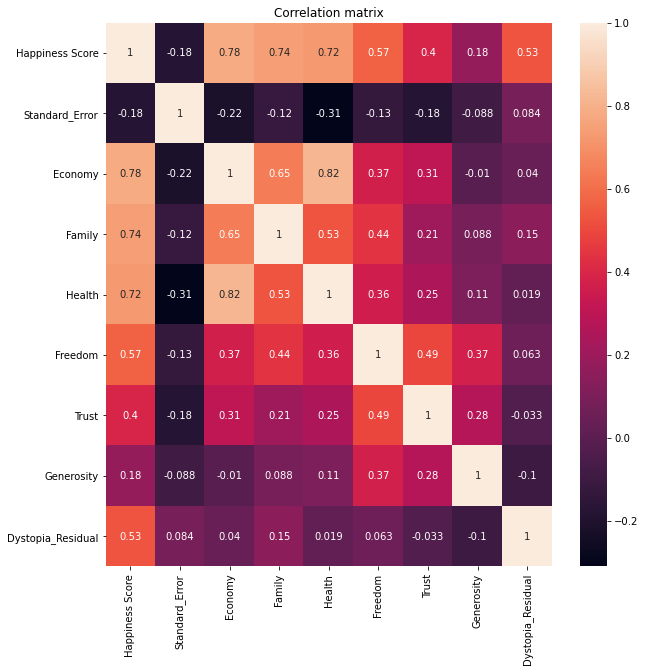

In [162]:
corr_mat  =data.corr()
#size of the canvas 
plt.figure(figsize = [10,10])
#plor the correlation matrix
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation matrix')
plt.show()

In [163]:
corr_matrix = data.corr()
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score      1.000000
Economy              0.780966
Family               0.740605
Health               0.724200
Freedom              0.568211
Dystopia_Residual    0.530474
Trust                0.395199
Generosity           0.180319
Standard_Error      -0.177254
Name: Happiness Score, dtype: float64

#### as we can see through heat map there is possibility that Economy and health column are corelated so we have to confirm by scatter plot are they following any trend

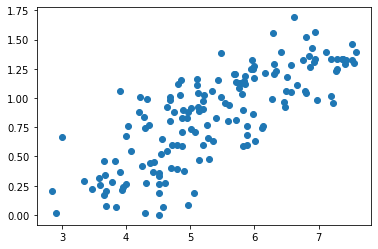

In [164]:
plt.scatter(y ='Economy',x='Happiness Score',data=data)

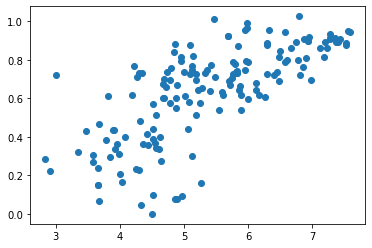

In [165]:
plt.scatter(y ='Health',x='Happiness Score',data=data)

In [166]:
# cant see any trend soo we can cant say they are highly corelated

In [167]:
# seeing data distribution by histogram

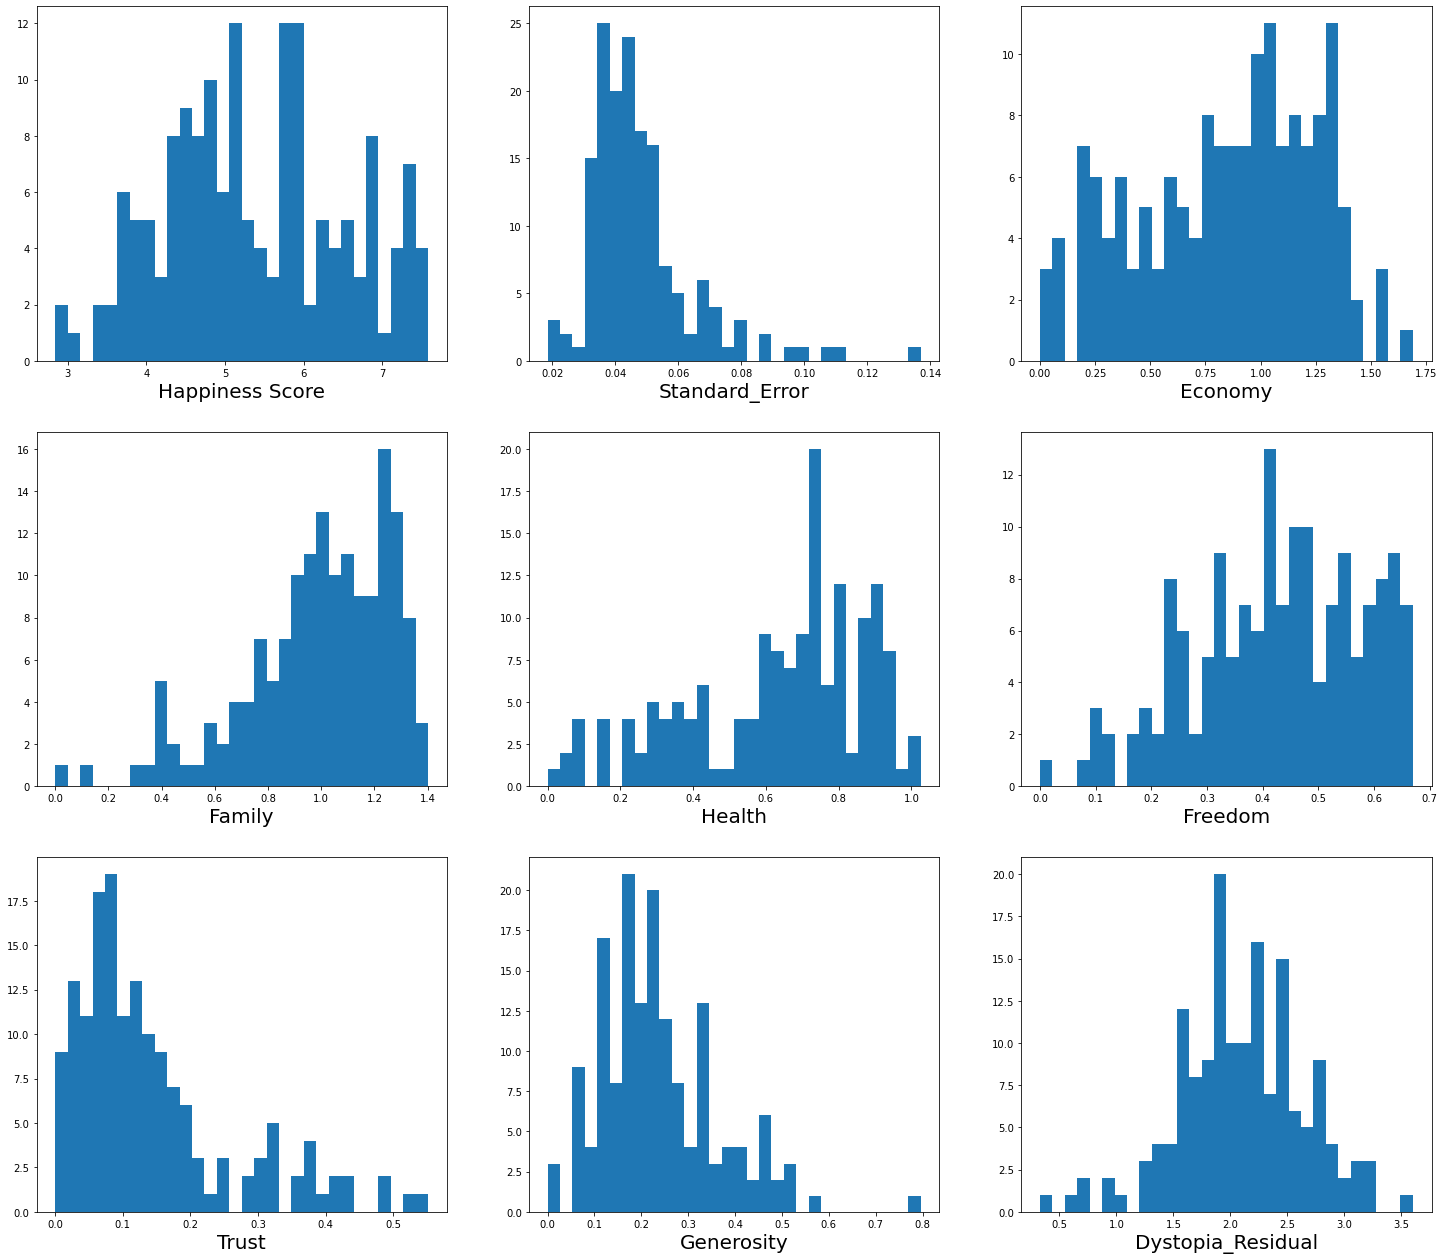

In [168]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=12: #as there are 9 columns in data
        ax=plt.subplot(4,3,plotnumber)
        plt.hist(data[column],bins=30)
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

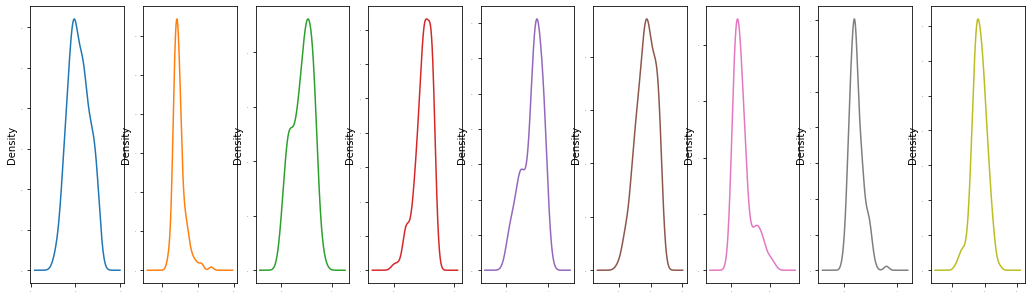

In [169]:
data.plot(kind = 'density',subplots = True, layout = (10,20), sharex = False, legend =False ,fontsize =1,figsize=(40,60))
plt.show()

In [170]:
# we can see skewness in data, we will handle it in furthur steps

### splitting the independent and target variable in X and Y before removing the skewness

In [171]:
x = data.drop(['Happiness Score'],axis = 1)
y = data['Happiness Score']

In [172]:
x.skew().sort_values(ascending = False)

Standard_Error       1.983439
Trust                1.385463
Generosity           1.001961
Dystopia_Residual   -0.238911
Economy             -0.317575
Freedom             -0.413462
Health              -0.705328
Family              -1.006893
dtype: float64

### We can see skewness in the most of the columns of dataset. we will remove the skewness using the Standard scaler (and value accepted is -0.5 to 0.5)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(x)

In [174]:
x = pd.DataFrame(x_new,columns = x.columns)

In [175]:
sk = x.skew()
sk[np.abs(sk)>0.25].all()

True

### Checking outliers

<function matplotlib.pyplot.show(close=None, block=None)>

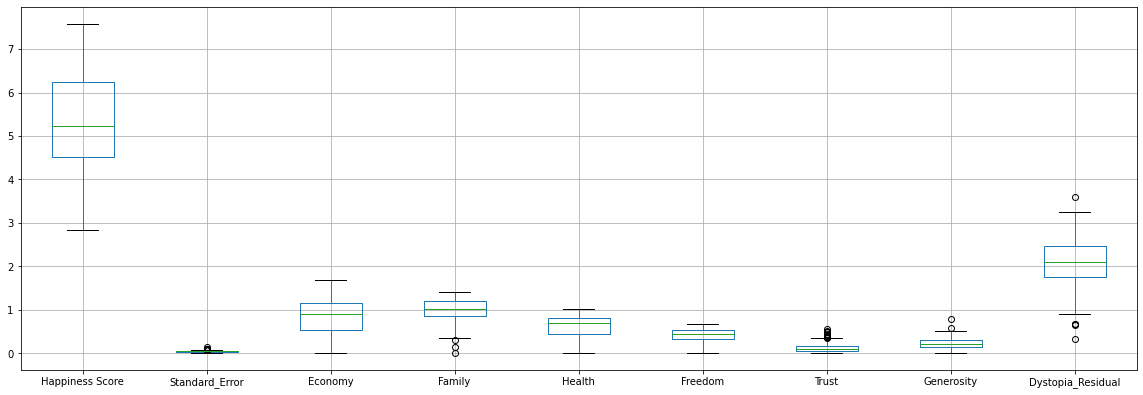

In [176]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show

In [177]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

Happiness Score      1.717750
Standard_Error       0.015032
Economy              0.612640
Family               0.357582
Health               0.371828
Freedom              0.220762
Trust                0.118580
Generosity           0.159330
Dystopia_Residual    0.703005
dtype: float64

In [178]:
Se=(q3.Standard_Error+1.5*IQR.Standard_Error)

index = np.where(data['Standard_Error']>Se)

data=data.drop(data.index[index])

data.reset_index()

,index,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
143,152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
144,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
145,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
146,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [179]:
Se=(q3.Family-1.5*IQR.Family)

index = np.where(data['Family']<Se)

data=data.drop(data.index[index])

data.reset_index()

,index,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
125,145,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
126,148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
127,150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
128,151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [180]:
Se=(q3.Generosity+1.5*IQR.Generosity)

index = np.where(data['Generosity']>Se)

data=data.drop(data.index[index])

data.reset_index()

,index,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
123,145,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
124,148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
125,150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
126,151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [181]:
Se=(q3.Dystopia_Residual-1.5*IQR.Dystopia_Residual)

index = np.where(data['Dystopia_Residual']<Se)

data=data.drop(data.index[index])

data.reset_index()

,index,Happiness Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
113,141,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
114,143,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
115,148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
116,150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723


<function matplotlib.pyplot.show(close=None, block=None)>

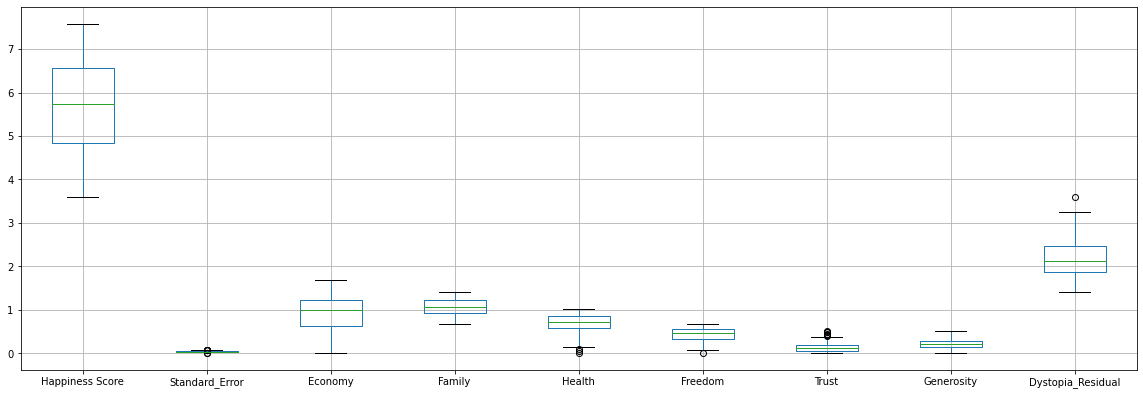

In [183]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show

### now there are outliers but only on whiskers so they can be taken

### Training process begins

### finding best random_state

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split

In [186]:
maxAcc = 0 #maximum accuracy
maxRs = 0 #best random state value for which max accuracy is achieved 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train) #fitting the data will train your model
    predlr = rf.predict(x_test) #this is the predicted target variable
    acc =r2_score(y_test,predlr)
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("Best accuracy is",maxAcc,"on random state",maxRs)

Best accuracy is 0.9536011114244315 on random state 163


In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=163)

## linear regression

In [188]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy score", r2_score(y_test, predlr)*100)

Accuracy score 99.9999932372894


In [189]:
Lr.score(x_test,y_test)

0.999999932372894

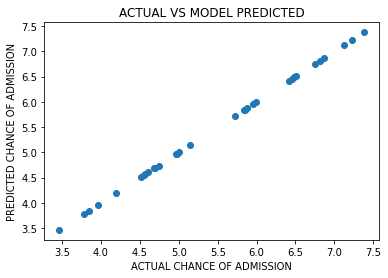

In [190]:
plt.scatter(y_test,predlr)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

## Support vector machine

In [191]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
predlr = svr.predict(x_test)
print("Accuracy score", r2_score(y_test, predlr)*100)

Accuracy score 91.64518775827926


## Decision Tree 

In [192]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_dt)*100)

Accuracy score 87.18225961671338


## Random forest

In [193]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_rf)*100)

Accuracy score 95.28191671109006


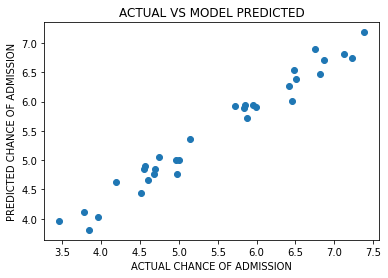

In [194]:
plt.scatter(y_test,pred_rf)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

## XGBOOST

In [195]:
from xgboost import XGBRegressor
xgbt = XGBRegressor()
xgbt.fit(x_train,y_train)
pred_xgbt = xgbt.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_xgbt)*100)

Accuracy score 95.68931411623471


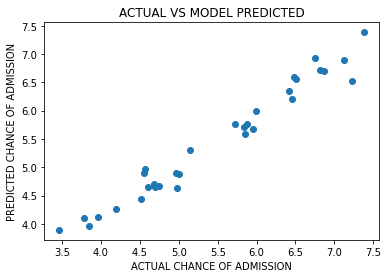

In [196]:
plt.scatter(y_test,pred_xgbt)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

## Gradient boosting

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_gbr)*100)

Accuracy score 95.93007166944845


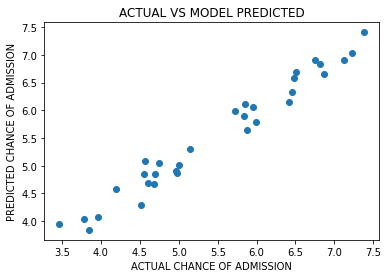

In [198]:
plt.scatter(y_test,pred_gbr)
plt.xlabel("ACTUAL CHANCE OF ADMISSION")
plt.ylabel("PREDICTED CHANCE OF ADMISSION")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

### All of them (except decision tree)  are giving good accuracy. performing cross validation to check overfitting

In [200]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(Lr, x_train, y_train, cv=5)
print("Cross validation score of linear regression model is",scr.mean())

Cross validation score of linear regression model is 0.9999999268594142


In [201]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svr, x_train, y_train, cv=5)
print("Cross validation score of linear regression model is",scr.mean())

Cross validation score of linear regression model is 0.9371623596460641


In [202]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x_train, y_train, cv=5)
print("Cross validation score of linear regression model is",scr.mean())

Cross validation score of linear regression model is 0.7520892324371051


In [203]:
scr = cross_val_score(rf, x_train, y_train, cv=5)
print("Cross validation score of Random forest model is",scr.mean())

Cross validation score of Random forest model is 0.8817679644966067


In [204]:
scr = cross_val_score(xgbt, x_train, y_train, cv=5)
print("Cross validation score of Xtreme boosting model is",scr.mean())

Cross validation score of Xtreme boosting model is 0.8924225772220238


In [205]:
scr = cross_val_score(gbr, x_train, y_train, cv=5)
print("Cross validation score of Gradient boosting model is",scr.mean())

Cross validation score of Gradient boosting model is 0.9076432517124691


### as we can see there is no need of hypertuning as accuracy of linear regression model is 99% 

In [208]:
import joblib
joblib.dump(Lr,"World_happiness_report.obj")

['World_happiness_report.obj']

In [212]:
model=joblib.load("E:\Data science\capstone project\world happieness report\World_happiness_report.obj")

In [213]:
y_preds=model.predict(x_test)

In [214]:
prediction=pd.DataFrame()
prediction['original_values']=y_test

In [215]:
prediction['predicted_by_model']=y_preds

In [216]:
prediction.sample(10)

,original_values,predicted_by_model
54,5.848,5.847637
55,5.833,5.832673
117,4.550,4.550599
48,5.960,5.959659
116,4.565,4.564654
83,5.140,5.140389
31,6.485,6.485115
153,3.465,3.464859
44,5.995,5.995102
114,4.610,4.609730
